# Abstract

In this lab, I use the Iris dataset to perform Logistic Regression, k-Nearest Neighbors, and Decision Trees. I then evaluate the performance of each model using accuracy, precision, recall, and F1-score to determine which model is the most effective. I was unable to determine which model performed the best, as all three classified the iris species perfectly.

# Introduction

The objective of the study is to compare three popular types of classification models and their performance. I can use the results of this lab to determine which type of classification model is most effective for this type of data.

# Related Work

I reference Chapter 3 of Dr. Itauma's book, "Machine Learning using Python", which discusses these classification models, to perform my own code. I also reference the LinkedIn Learning courses "Machine Learning with Python: Logistic Regression" and "Machine Learning with Python: Decision Trees" for additional coding support.

# Methodology

## Loading and Processing Data

In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv("Iris.csv")

In [3]:
iris.head()

,Id,sepal length,sepal width,petal length,petal width,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   sepal length  150 non-null    float64
 2   sepal width   150 non-null    float64
 3   petal length  150 non-null    float64
 4   petal width   150 non-null    float64
 5   class         150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


The dataset does not have missing variables, and there is nothing to preprocess, so we will now visualize the data.

## Exploratory Data Analysis

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Here we plot sepal length vs sepal width, separated by class.

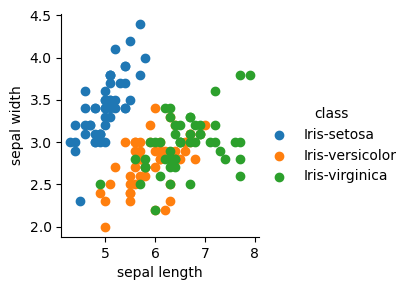

In [6]:
sns.FacetGrid(iris, hue="class") \
   .map(plt.scatter, "sepal length", "sepal width") \
   .add_legend()

We now plot petal length vs petal width, separated by class.

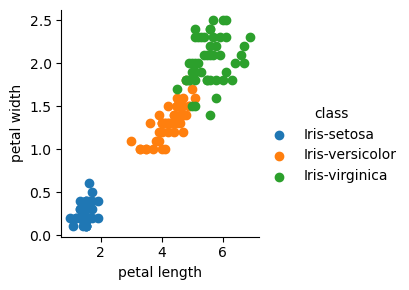

In [7]:
sns.FacetGrid(iris, hue="class") \
   .map(plt.scatter, "petal length", "petal width") \
   .add_legend()

Now, we look at boxplots for each variable by class.

<Axes: xlabel='class', ylabel='petal length'>

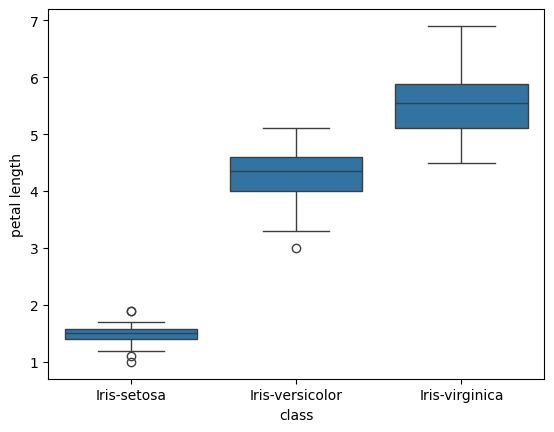

In [8]:
sns.boxplot(x="class", y="petal length", data=iris) ## Petal Length

<Axes: xlabel='class', ylabel='petal width'>

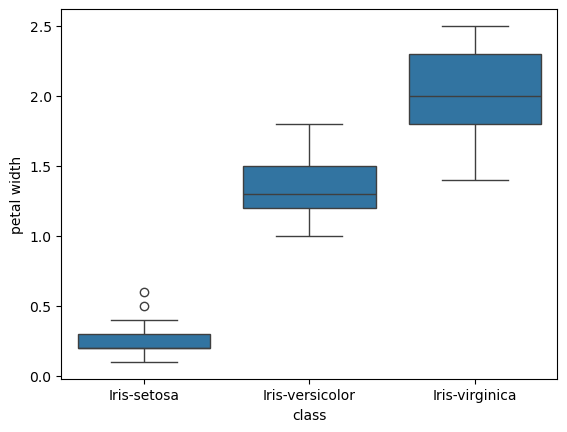

In [9]:
sns.boxplot(x="class", y="petal width", data=iris) ## Petal Width

<Axes: xlabel='class', ylabel='sepal length'>

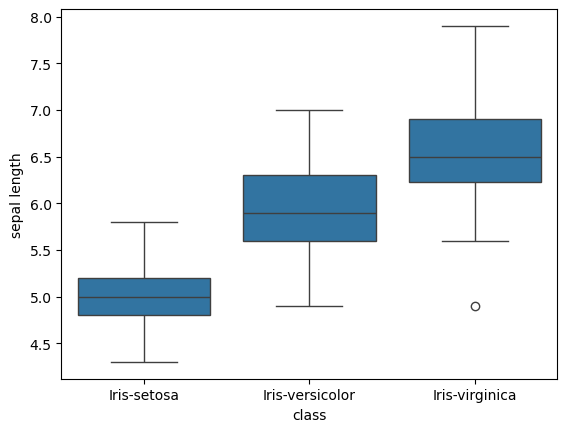

In [10]:
sns.boxplot(x="class", y="sepal length", data=iris) ## Sepal Length

<Axes: xlabel='class', ylabel='sepal width'>

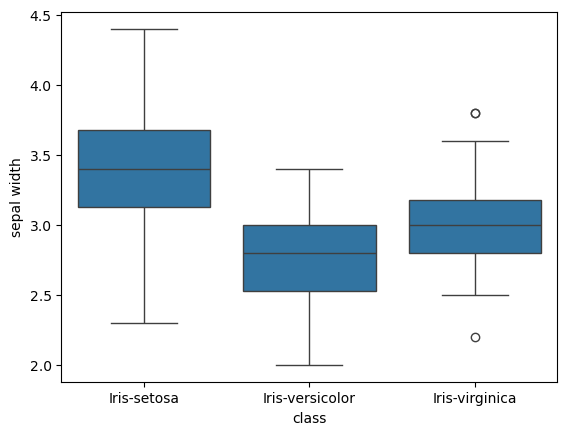

In [11]:
sns.boxplot(x="class", y="sepal width", data=iris) ## Sepal Width

Overall, it seems like the relationship between petal length and width are useful in classifying the iris species, as well as petal length and width themselves, and the sepal length.

## Classification Models

First, we will split the dataset into x and y, and then into training and testing sets.

In [12]:
X = iris.loc[:, ['sepal length','sepal width', 'petal length', 'petal width',]].values
y = iris.loc[:, 'class'].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=42)
logistic.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

ypred_logistic = logistic.predict(X_test)

In [16]:
print("The accuracy is", accuracy_score(y_test, ypred_logistic))
print(classification_report(y_test, ypred_logistic))

The accuracy is 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### k-Nearest Neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
ypred_knn = knn.predict(X_test)

In [19]:
print("The accuracy is", accuracy_score(y_test, ypred_knn))
print(classification_report(y_test, ypred_knn))

The accuracy is 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
ypred_tree = tree.predict(X_test)

In [22]:
print("The accuracy is", accuracy_score(y_test, ypred_tree))
print(classification_report(y_test, ypred_tree))

The accuracy is 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Results

All three of the classification models used in this lab resulted in perfect accuracy, precision, recall, and F1-score. Thus, it is impossible to compare on which one was the most effective in predicting the iris species in the dataset.

# Discussion

The results show that all three classification models were perfectly effective in predicting the iris species in the dataset. This shows that all three models can be used to great success when predicting a categorical variable using numeric variables, like in this case. However, in order to properly determine which model was the most effective, perhaps a different dataset should be used, such as one with more variables, or one with messier data. This can perhaps better show which model is best at dealing with different things in the data.

# Conclusion

Overall, Logistic Regression, k-Nearest Neighbors, and Decision Tree were all effective in classifying the different iris species using sepal length, sepal width, petal length, and petal width. Further research with different datasets can be conducted to determine which model is most effective for which type of dataset.

# References

Itauma, I. (n.d.). 3  Chapter 3: Supervised learning - classification. Machine Learning using Python - 3  Chapter 3: Supervised Learning - Classification. https://amightyo.quarto.pub/machine-learning-using-python/Chapter_3.html 

Nwanganga, F. (2022, May 20). How to build a classification tree in Python - python video tutorial: Linkedin learning, formerly Lynda.com. LinkedIn. https://www.linkedin.com/learning/machine-learning-with-python-decision-trees/how-to-build-a-classification-tree-in-python?u=279222306 

Nwanganga, F. (2022b, November 9). Classifying data with logistic regression - python video tutorial: Linkedin learning, formerly Lynda.com. LinkedIn. https://www.linkedin.com/learning/machine-learning-with-python-logistic-regression/classifying-data-with-logistic-regression?u=279222306 